# Machine Learning Foundation

## Section 1, Part d: Feature Engineering

## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates

## 1. Simple EDA

In [ ]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


#### Load the Data, Examine and Explore

In [ ]:
## Load in the Ames Housing Data
datafile = "D:\Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

In [ ]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

<AxesSubplot:>

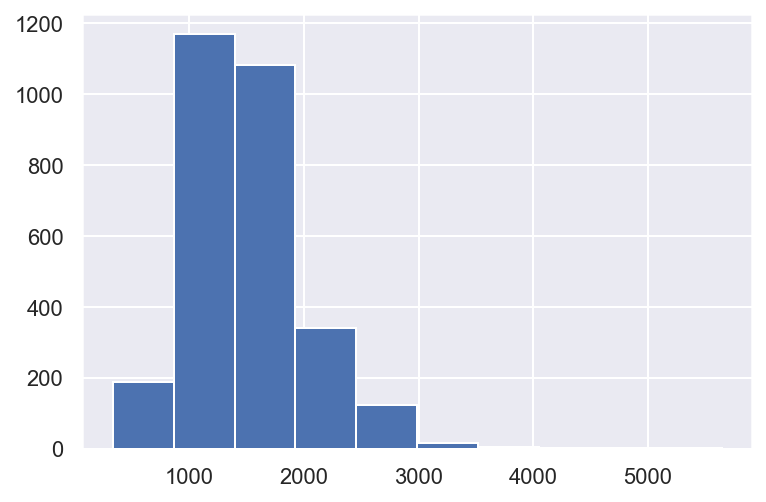

In [ ]:
df['Gr Liv Area'].hist()

In [ ]:
# This is recommended by the data set author to remove a few outliers
df=df.loc[df['Gr Liv Area']<4000,:]
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])

Number of rows in the data: 2925
Number of columns in the data: 82


In [ ]:
data = df.copy() # Keep a copy our original data

In [ ]:
# A quick look at the data:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
len(df['PID'].unique())

2925

In [ ]:
#Dropping columns for which every value is unique
#will ont ad any value  to our eventual model
df.drop(['PID','Order'],axis=1,inplace=True)

# Log Transformation Skew Variables

In [ ]:
df.select_dtypes('number')

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,170000


In [ ]:
#create a list of float columns to check for skewing
num_cols=df.select_dtypes('number').columns
num_cols

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [ ]:
skew_limit=0.75 # define a limit above which we will log transform

In [ ]:
skew_vals=df[num_cols].skew()
skew_vals

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

In [ ]:
#shewwed columns
skew_cols=skew_vals[abs(skew_vals)>0.75].sort_values(ascending=False)
skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

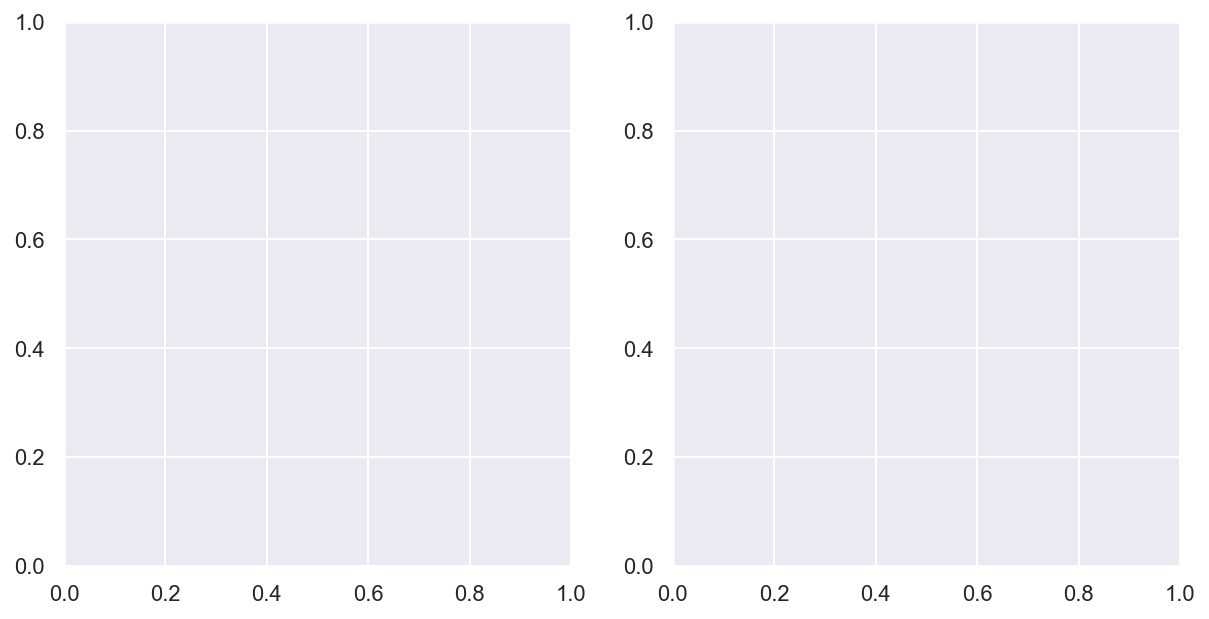

In [ ]:
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))

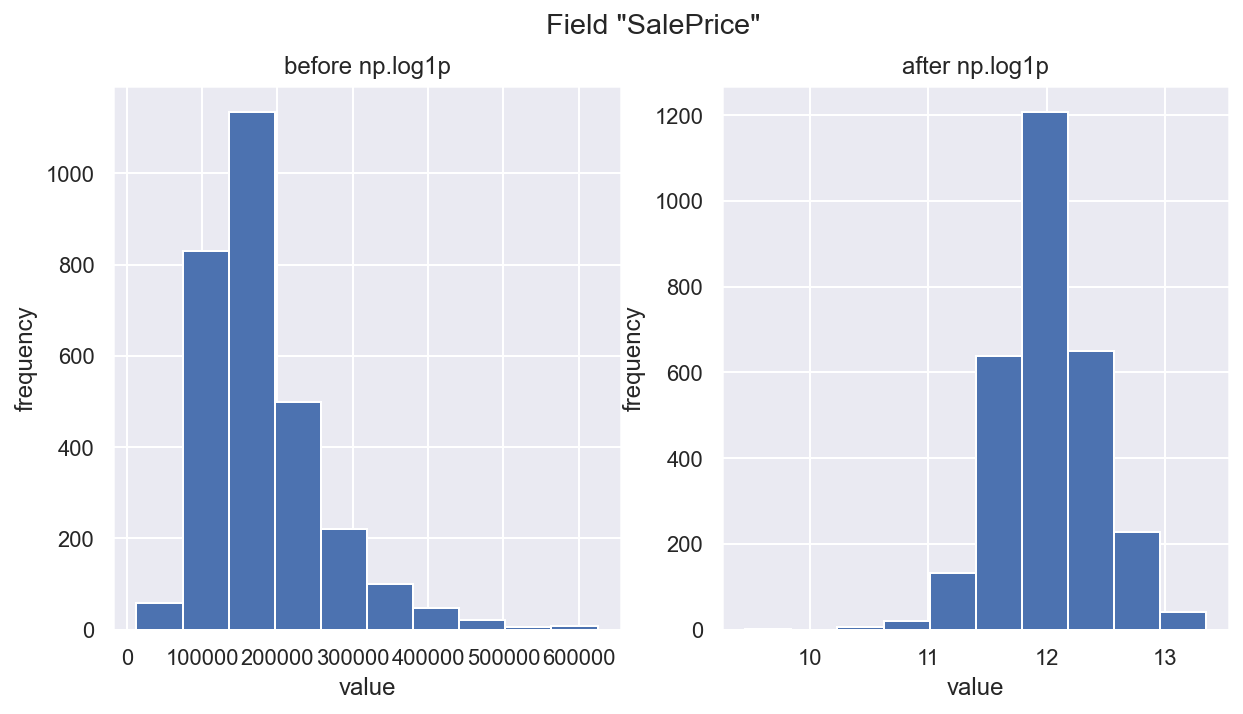

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

#choose a filed
field='SalePrice'

#create two 'subplots' and a 'figure'using matplotlib
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))


#create a histigram on the 'ax_before' subplot
df[field].hist(ax=ax_before)

#create a log transformation (numpy syntax) to this columns
df[field].apply(np.log).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value');
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value');
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col=='SalePrice':
        continue
    df[col]=df[col].apply(np.log)

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable.
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [ ]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars','SalePrice']]

In [ ]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,9.090018,0.508393,7.170120,8.914357,9.151439,9.351406,12.279532
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
Gr Liv Area,2925.0,7.258042,0.320993,5.811141,7.026427,7.273093,7.461640,8.248006
Full Bath,2925.0,1.564786,0.551386,0.000000,1.000000,2.000000,2.000000,4.000000
Bedroom AbvGr,2925.0,2.853675,0.827737,0.000000,2.000000,3.000000,3.000000,8.000000
Fireplaces,2925.0,0.596923,0.645349,0.000000,0.000000,1.000000,1.000000,4.000000
Garage Cars,2924.0,1.765048,0.759834,0.000000,1.000000,2.000000,2.000000,5.000000


In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


In [ ]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df=smaller_df.fillna(0)

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


# Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

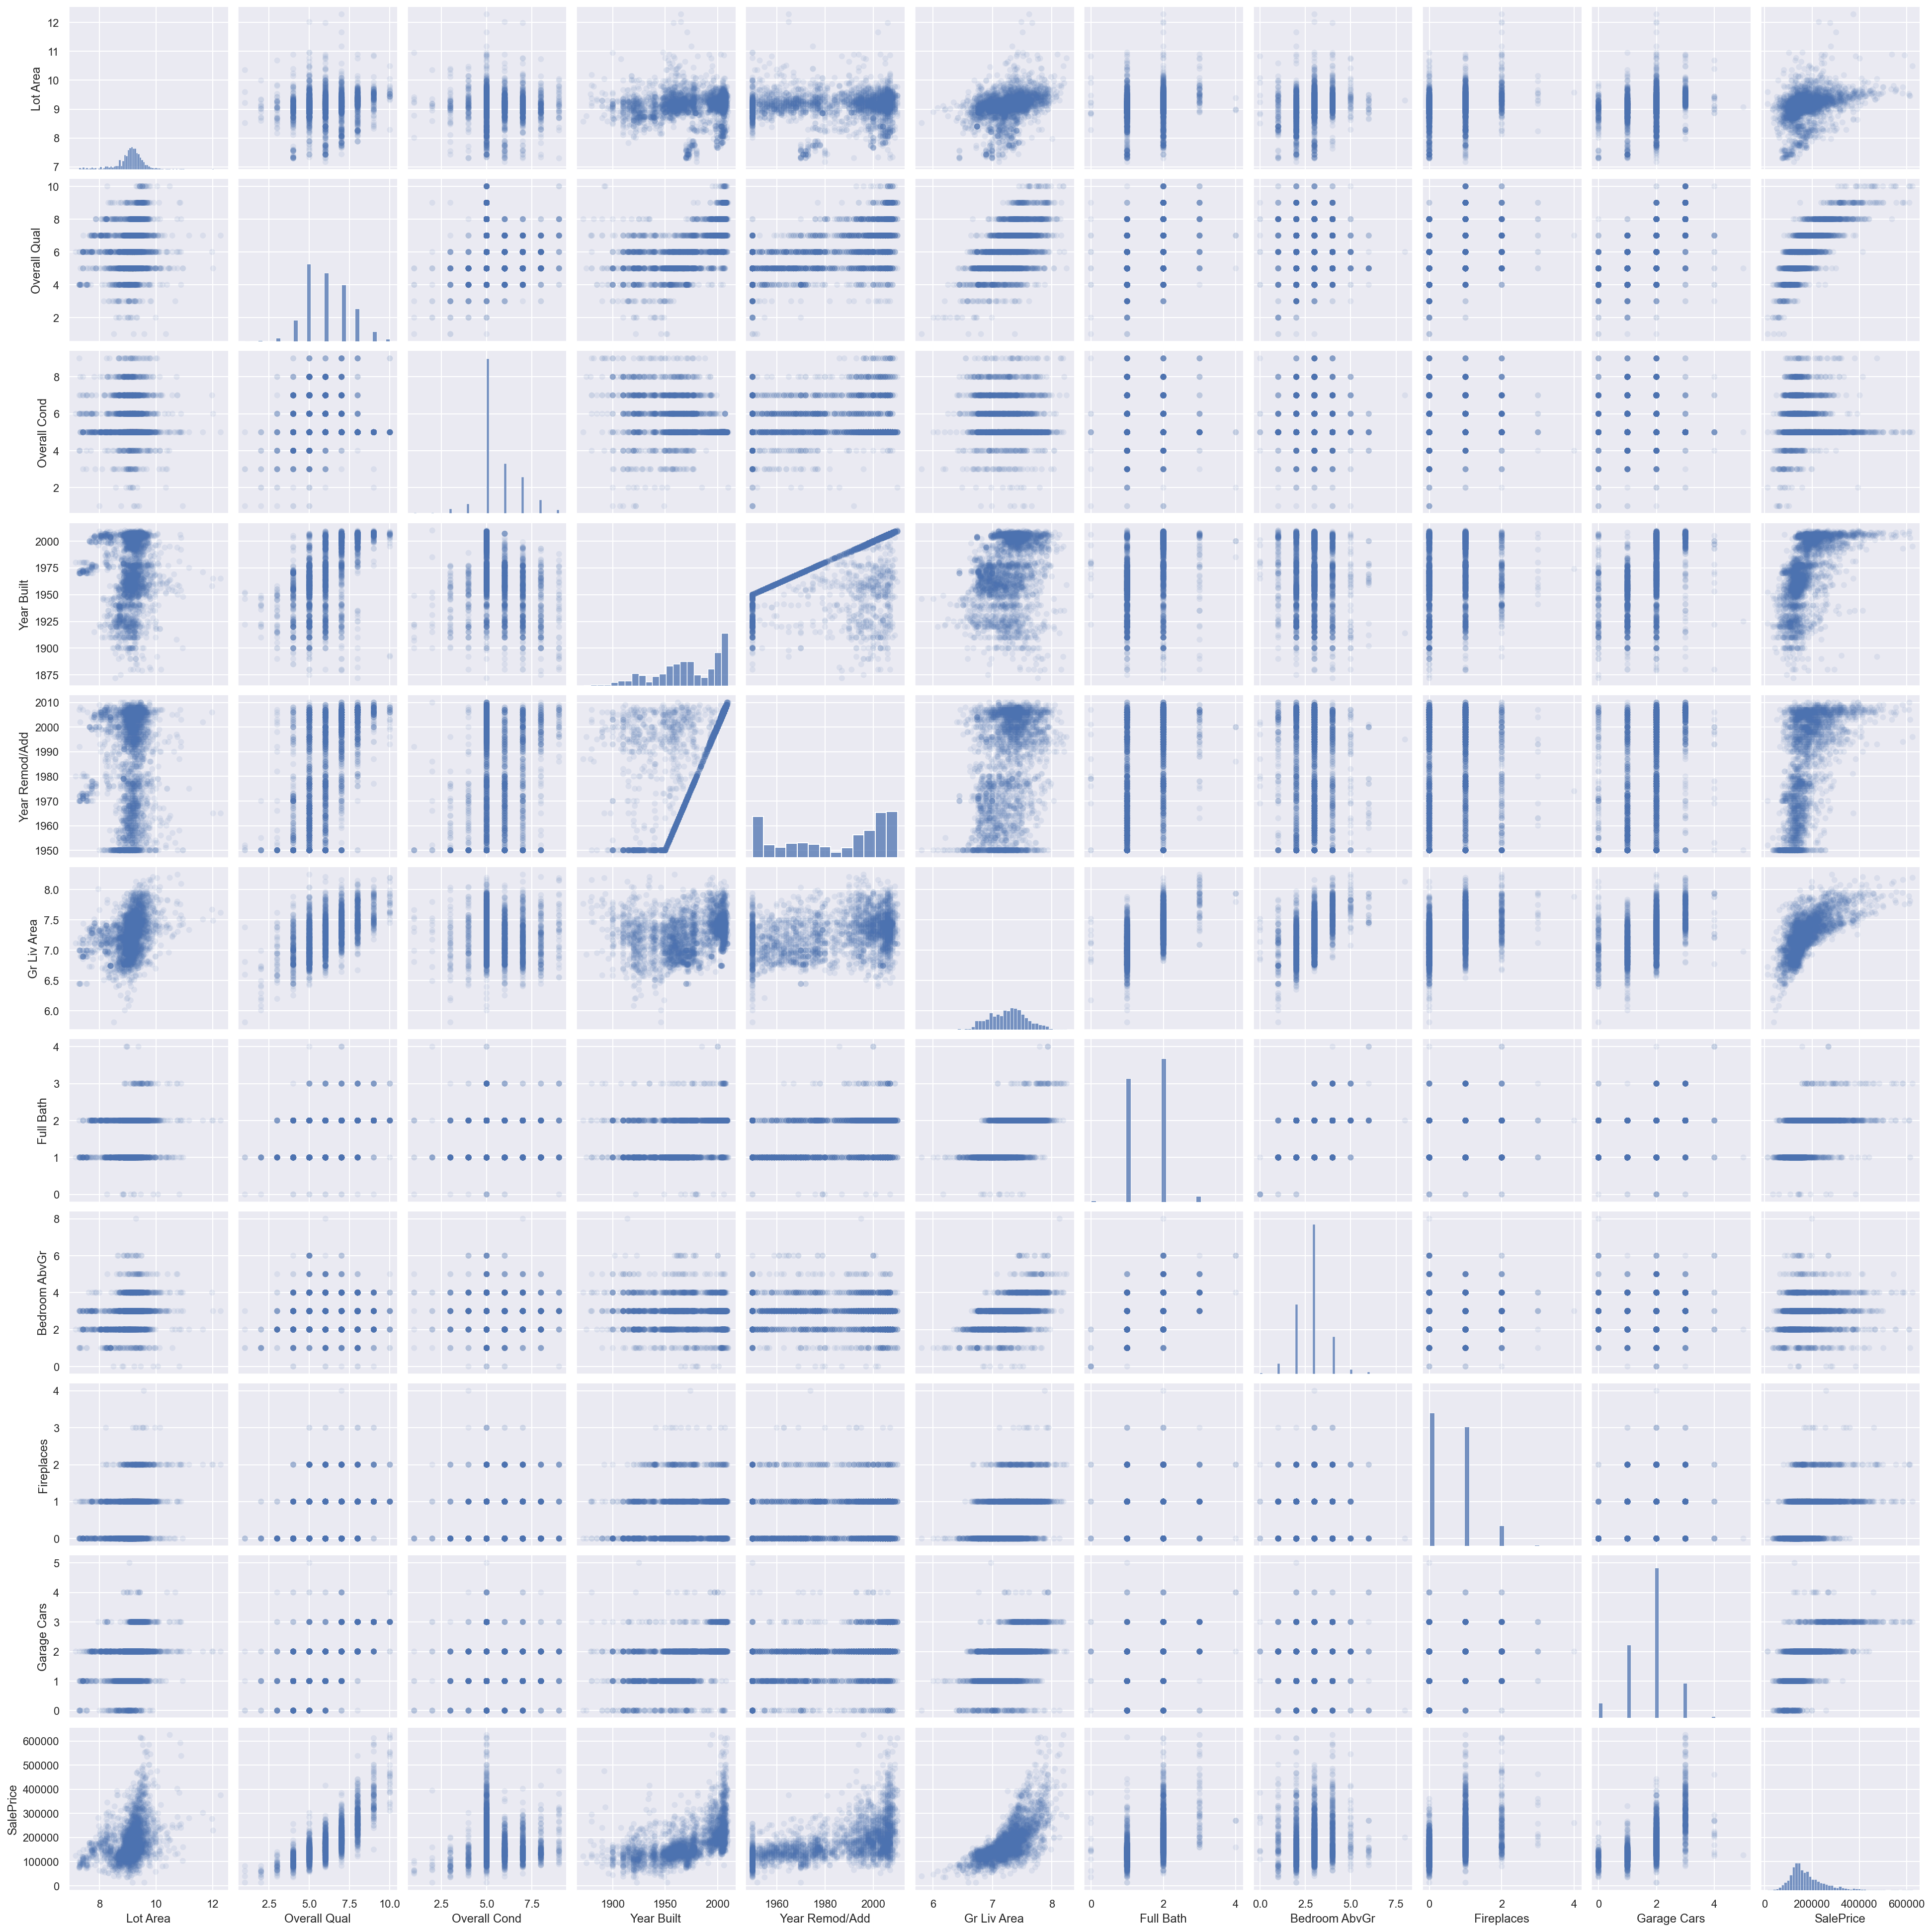

In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

Data Exploration Discussion:

What do these plots tell us about the distribution of the target?

What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here?

In [ ]:
x=smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars']]#features
y = smaller_df['SalePrice']#target

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 315.9 KB


# Basic feature engineering: adding polynomial and interaction terms
One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'Overall Qual' and 'Gr Liv Qual', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.

# Polynomial Features¶

In [ ]:
x2=x.copy()

x2['Over Qual2']=x2['Overall Qual']**2
x2['Gr Liv Area2']=x2['Gr Liv Area']**2


# Interaction Feature

In [ ]:
X3 = x2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']


# Categories and features derived from category aggregates
Incorporating categorical features into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called dummy variables or one-hot-encoding.

We'll first explore this using the 'House Style' feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [ ]:
data['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [ ]:
pd.get_dummies(df)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,2.995732,4.948760,10.366278,6,5,1960,1960,4.718499,6.459904,-inf,...,0,0,0,1,0,0,0,0,1,0
1,2.995732,4.382027,9.360655,5,6,1961,1961,-inf,6.148468,4.969813,...,0,0,0,1,0,0,0,0,1,0
2,2.995732,4.394449,9.565704,6,6,1958,1958,4.682131,6.827629,-inf,...,0,0,0,1,0,0,0,0,1,0
3,2.995732,4.532599,9.320091,7,5,1968,1968,-inf,6.970730,-inf,...,0,0,0,1,0,0,0,0,1,0
4,4.094345,4.304065,9.534595,5,5,1997,1998,-inf,6.673298,-inf,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,4.382027,3.610918,8.979291,6,6,1984,1984,-inf,6.708084,-inf,...,0,0,0,1,0,0,0,0,1,0
2926,2.995732,NaN,9.092120,5,5,1983,1983,-inf,5.707110,5.780744,...,0,0,0,1,0,0,0,0,1,0
2927,4.442651,4.127134,9.253496,5,5,1992,1992,-inf,5.820083,-inf,...,0,0,0,1,0,0,0,0,1,0
2928,2.995732,4.343805,9.211340,5,5,1974,1975,-inf,6.976348,4.812184,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
pd.get_dummies(df['House Style']).head()

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0


We can call pd.get_dummies() on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values

In [ ]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [ ]:
nbh_counts[nbh_counts<=8].index

Index(['Greens', 'GrnHill', 'Landmrk'], dtype='object')

In [ ]:
other_nbhs=list(nbh_counts[nbh_counts<=8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [ ]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


In [ ]:
X4['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64

# fanciar features

Getting to fancier features¶

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [ ]:
def add_deviation_feature(X, feature, category):

    # temp groupby object
    category_gb = X.groupby(category)[feature]

    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())

    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviation_feature

In [ ]:
X4

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,Over Qual2,Gr Liv Area2,OQ_x_YB,OQ_/_LA,Neighborhood
0,10.366278,6,5,1960,1960,7.412160,1,3,2,2.0,36,54.940121,11760,0.578800,NAmes
1,9.360655,5,6,1961,1961,6.797940,1,2,0,1.0,25,46.211994,9805,0.534151,NAmes
2,9.565704,6,6,1958,1958,7.192182,1,3,0,1.0,36,51.727483,11748,0.627241,NAmes
3,9.320091,7,5,1968,1968,7.654443,2,3,2,2.0,49,58.590501,13776,0.751066,NAmes
4,9.534595,5,5,1997,1998,7.395722,2,3,1,2.0,25,54.696698,9985,0.524406,Gilbert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979291,6,6,1984,1984,6.910751,1,3,0,2.0,36,47.758476,11904,0.668204,Mitchel
2926,9.092120,5,5,1983,1983,6.804615,1,2,0,2.0,25,46.302779,9915,0.549927,Mitchel
2927,9.253496,5,5,1992,1992,6.877296,1,3,0,0.0,25,47.297201,9960,0.540336,Mitchel
2928,9.211340,5,5,1974,1975,7.236339,1,2,1,2.0,25,52.364607,9870,0.542809,Mitchel


In [ ]:
# temp groupby object
#category_gb = X.groupby(category)[feature]

X4.groupby('Neighborhood')['Overall Qual'].mean()

Neighborhood
Blmngtn    7.142857
Blueste    6.600000
BrDale     5.733333
BrkSide    5.120370
ClearCr    5.977273
CollgCr    6.677903
Crawfor    6.271845
Edwards    4.973822
Gilbert    6.515152
IDOTRR     4.731183
MeadowV    4.378378
Mitchel    5.543860
NAmes      5.334086
NPkVill    6.260870
NWAmes     6.343511
NoRidge    7.869565
NridgHt    8.277108
OldTown    5.205021
Other      7.636364
SWISU      5.437500
Sawyer     5.066225
SawyerW    6.336000
Somerst    7.401099
StoneBr    8.372549
Timber     7.194444
Veenker    7.208333
Name: Overall Qual, dtype: float64

In [ ]:
 # create category means and standard deviations for each observation
    #category_mean = category_gb.transform(lambda x: x.mean())
  #  category_std = category_gb.transform(lambda x: x.std())

In [ ]:
X4.groupby('Neighborhood')['Overall Qual'].transform(lambda x:x.mean())
#frequency of num like from 2925 to 2929 mean that this belong to the same neighborhood

0       5.334086
1       5.334086
2       5.334086
3       5.334086
4       6.515152
          ...   
2925    5.543860
2926    5.543860
2927    5.543860
2928    5.543860
2929    5.543860
Name: Overall Qual, Length: 2925, dtype: float64

In [ ]:
x5=X4.copy()
x5['House Style']=df['House Style']
add_deviation_feature(x5,'Year Built','House Style')
add_deviation_feature(x5,'Overall Qual','Neighborhood')
x5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,Over Qual2,Gr Liv Area2,OQ_x_YB,OQ_/_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,10.366278,6,5,1960,1960,7.412160,1,3,2,2.0,36,54.940121,11760,0.578800,NAmes,1Story,-0.590334,0.857503
1,9.360655,5,6,1961,1961,6.797940,1,2,0,1.0,25,46.211994,9805,0.534151,NAmes,1Story,-0.551186,-0.430205
2,9.565704,6,6,1958,1958,7.192182,1,3,0,1.0,36,51.727483,11748,0.627241,NAmes,1Story,-0.668629,0.857503
3,9.320091,7,5,1968,1968,7.654443,2,3,2,2.0,49,58.590501,13776,0.751066,NAmes,1Story,-0.277154,2.145211
4,9.534595,5,5,1997,1998,7.395722,2,3,1,2.0,25,54.696698,9985,0.524406,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979291,6,6,1984,1984,6.910751,1,3,0,2.0,36,47.758476,11904,0.668204,Mitchel,SLvl,0.505068,0.434947
2926,9.092120,5,5,1983,1983,6.804615,1,2,0,2.0,25,46.302779,9915,0.549927,Mitchel,1Story,0.310059,-0.518590
2927,9.253496,5,5,1992,1992,6.877296,1,3,0,0.0,25,47.297201,9960,0.540336,Mitchel,SFoyer,1.096487,-0.518590
2928,9.211340,5,5,1974,1975,7.236339,1,2,1,2.0,25,52.364607,9870,0.542809,Mitchel,1Story,-0.042269,-0.518590


We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

C:\Users\magic\AppData\Local\Temp/ipykernel_25428/3961705766.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals


,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


We're going to first do some basic data cleaning on this data:

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:

In [ ]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

C:\Users\magic\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
MS SubClass,2925.0,3.796448,0.710670,2.995732,2.995732,3.912023,4.248495,5.247024
Lot Frontage,2435.0,4.176731,0.356178,3.044522,4.060443,4.219508,4.382027,5.746203
Lot Area,2925.0,9.090018,0.508393,7.170120,8.914357,9.151439,9.351406,12.279532
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,0.004103,0.063931,0.000000,0.000000,0.000000,0.000000,1.000000
Sale Condition_Alloca,2925.0,0.008205,0.090225,0.000000,0.000000,0.000000,0.000000,1.000000
Sale Condition_Family,2925.0,0.015726,0.124437,0.000000,0.000000,0.000000,0.000000,1.000000
Sale Condition_Normal,2925.0,0.824615,0.380361,0.000000,1.000000,1.000000,1.000000,1.000000


### Categories and features derived from category aggregates

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Instantiate and provide desired degree;
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [ ]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [ ]:
pf.get_feature_names()  #Must add input_features = features for appropriate names

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [ ]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,10.366278,6.0,107.459714,62.197666,36.0
1,1.0,9.360655,5.0,87.621865,46.803276,25.0
2,1.0,9.565704,6.0,91.502702,57.394227,36.0
3,1.0,9.320091,7.0,86.864101,65.240639,49.0
4,1.0,9.534595,5.0,90.908510,47.672977,25.0
...,...,...,...,...,...,...
2920,1.0,8.979291,6.0,80.627661,53.875744,36.0
2921,1.0,9.092120,5.0,82.666641,45.460599,25.0
2922,1.0,9.253496,5.0,85.627182,46.267478,25.0
2923,1.0,9.211340,5.0,84.848782,46.056699,25.0


## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [_Pareto principle_](https://en.wikipedia.org/wiki/Pareto_principle), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model.

---
### Machine Learning Foundation (C) 2020 IBM Corporation